# In-vivo evidence for increased tau deposition in temporal lobe epilepsy

### Content
1. Participants
1.  *Figure 3:* Relationship to clinical and cognitive variables

# **Figure 3:** Relationship to clinical and cognitive variables


In [1]:
# Libraries
import numpy as np
import pandas as pd

# Load utilities functions from utils.py
from utils import *

### Load data

In [2]:
osf_path='/home/bic/rcruces/Desktop'

# Load the data frame
df = pd.read_csv(f'{osf_path}/18F-MK6240_database.csv')

# Load processed 18F-MK6240 PET data | matrix:{vertices x subjects}
pet_raw = np.load(f'{osf_path}/surf-fsLR-32k_desc-GroupData_smooth-10mm_pvc-probGM_ref-cerebellarGM_trc-18Fmk6240_pet.npy')

# Load the cortical thickness data | matrix:{vertices x subjects}
cth_raw = np.load(f'{osf_path}/surf-fsLR-32k_desc-GroupData_smooth-20mm_thickness.npy')


### Sort the matrices into ipsilateral/contralateral relative to seizure focus

In [3]:
# fsLR-32k length
n_64k = pet_raw.shape[1]
n_32k = int(n_64k/2)

# Flip R >> L 18F-mk6240
mk_ipsi, mk_contra = flip_mat(pet_raw[:,0:n_32k], pet_raw[:,n_32k:n_64k], df['lateralization'].values, flip='R')

# Merge ipsi and contra
tauMK6240 = np.concatenate((mk_ipsi, mk_contra), axis=1)


Flipping data from Right to Left


-----------------

### A | Tau MK6240 SUVR and clinical relationships

### Effect of age

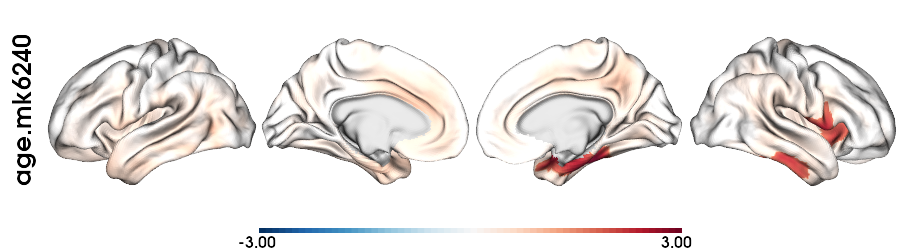

In [4]:
slm_surf(df, tauMK6240, feat='age.mk6240', neg_tail=False, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Effect of duration

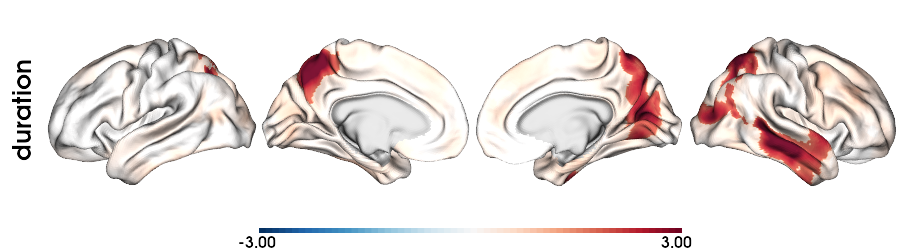

In [5]:
# Slice only Patients
idx = df['group'] == 'Patient'

slm_surf(df[idx], tauMK6240[idx,:], feat='duration', neg_tail=False, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### B | Tau MK6240 SUVR and behavioral relationships

### Epitrack score

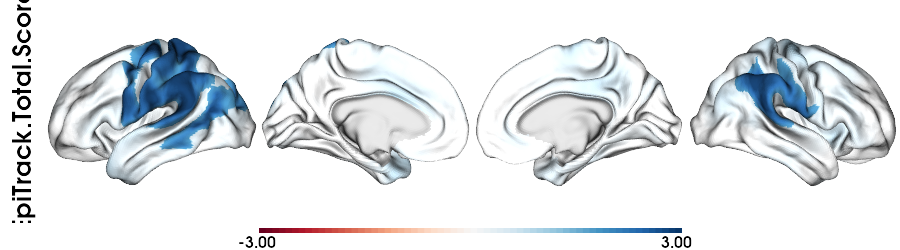

In [6]:
slm_surf(df, feat='EpiTrack.Total.Score', Y=tauMK6240, neg_tail=True, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Episodic memory

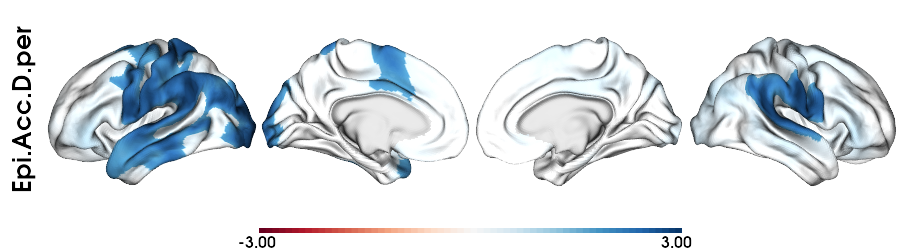

In [7]:
slm_surf(df, feat='Epi.Acc.D.per', Y=tauMK6240, neg_tail=True, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Semantic memory

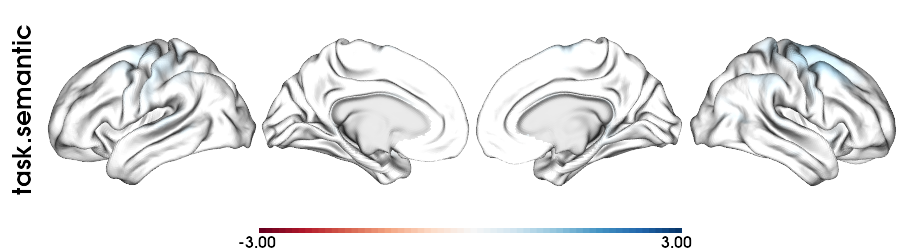

In [8]:
slm_surf(df, feat='task.semantic', Y=tauMK6240, neg_tail=True, cthr=0.05, alpha=0.5, scale=1, nan_color=(0.8, 0.8, 0.8, 1))